In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
#from imbalanced-learn import SMOTE

import os
import sys
import pickle

import warnings
warnings.filterwarnings('ignore')



ModuleNotFoundError: No module named 'xgboost'

In [2]:
data_path = '../data/processed/final_data.csv'

df = pd.read_csv(data_path)

In [3]:
df.columns.to_list()

['purchase_value',
 'device_id',
 'age',
 'ip_address',
 'class',
 'transaction_count',
 'transaction_velocity_hours',
 'hour_of_day',
 'day_of_week',
 'country_encoded',
 'source_Direct',
 'source_SEO',
 'browser_FireFox',
 'browser_IE',
 'browser_Opera',
 'browser_Safari',
 'sex_M']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148848 entries, 0 to 148847
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   purchase_value              148848 non-null  float64
 1   device_id                   148848 non-null  object 
 2   age                         148848 non-null  float64
 3   ip_address                  148848 non-null  int64  
 4   class                       148848 non-null  int64  
 5   transaction_count           148848 non-null  float64
 6   transaction_velocity_hours  148848 non-null  float64
 7   hour_of_day                 148848 non-null  int64  
 8   day_of_week                 148848 non-null  int64  
 9   country_encoded             148848 non-null  int64  
 10  source_Direct               148848 non-null  float64
 11  source_SEO                  148848 non-null  float64
 12  browser_FireFox             148848 non-null  float64
 13  browser_IE    

In [5]:
# Feature and Target Separation
X = df.drop(columns=['class','device_id'])
y = df['class']

In [6]:
# train test split 90% train 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133963, 15), (14885, 15), (133963,), (14885,))

In [7]:
log_reg = LogisticRegression( max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

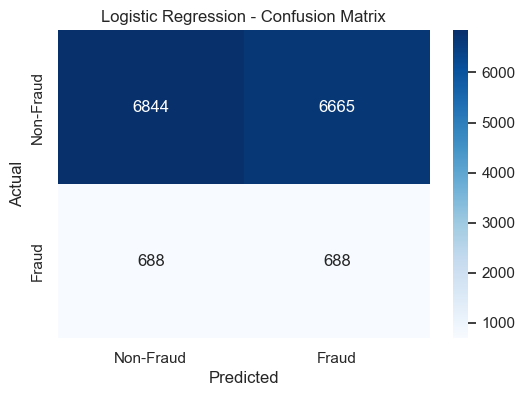

('              precision    recall  f1-score   support\n\n   Non-Fraud       0.91      0.51      0.65     13509\n       Fraud       0.09      0.50      0.16      1376\n\n    accuracy                           0.51     14885\n   macro avg       0.50      0.50      0.40     14885\nweighted avg       0.83      0.51      0.60     14885\n',
 'ROC-AUC Score: 0.4975')

In [8]:
# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_test, y_proba)

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

report, f"ROC-AUC Score: {roc_auc:.4f}"

### Decision tree model

In [9]:
# Train Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42, max_depth=15)  # Limiting depth to prevent overfitting
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [10]:
# Predictions
y_pred_dt = dtree.predict(X_test)
y_proba_dt = dtree.predict_proba(X_test)[:, 1]

In [11]:
# Evaluation Metrics
report_dt = classification_report(y_test, y_pred_dt, target_names=['Non-Fraud', 'Fraud'])
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

# Confusion Matrix Plot
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

In [12]:
print(report_dt, f"ROC-AUC Score: {roc_auc_dt:.4f}")
print(conf_matrix_dt)


              precision    recall  f1-score   support

   Non-Fraud       0.93      0.99      0.96     13509
       Fraud       0.65      0.26      0.37      1376

    accuracy                           0.92     14885
   macro avg       0.79      0.62      0.66     14885
weighted avg       0.90      0.92      0.90     14885
 ROC-AUC Score: 0.7173
[[13321   188]
 [ 1025   351]]


### RandomForest Model

In [13]:
# Train random forest classifier
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
# Predictions
y_pred_rf = model.predict(X_test)
y_proba_rf = model.predict_proba(X_test)[:, 1]


In [15]:
# Evaluation Metrics
report_rf = classification_report(y_test, y_pred_rf, target_names=['Non-Fraud', 'Fraud'])
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [16]:
print(conf_matrix_rf)

[[13496    13]
 [  663   713]]


In [17]:
print(report_rf)
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")



              precision    recall  f1-score   support

   Non-Fraud       0.95      1.00      0.98     13509
       Fraud       0.98      0.52      0.68      1376

    accuracy                           0.95     14885
   macro avg       0.97      0.76      0.83     14885
weighted avg       0.96      0.95      0.95     14885

ROC-AUC Score: 0.7600


### xgboost model

### Multi layer perceptron classifier

In [38]:
# Train MLP Model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [39]:
# Predictions
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
report_mlp = classification_report(y_test, y_pred_mlp, target_names=['Non-Fraud', 'Fraud'])
roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp)

# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)


In [40]:
print(conf_matrix_mlp)
print(report_mlp)
print(f"ROC-AUC Score: {roc_auc_mlp:.4f}")

[[13509     0]
 [ 1376     0]]
              precision    recall  f1-score   support

   Non-Fraud       0.91      1.00      0.95     13509
       Fraud       0.00      0.00      0.00      1376

    accuracy                           0.91     14885
   macro avg       0.45      0.50      0.48     14885
weighted avg       0.82      0.91      0.86     14885

ROC-AUC Score: 0.5000


# Handling Data Imbalance

In [41]:
from sklearn.utils import resample


In [42]:
# Combine features and target into one DataFrame
data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
non_fraud = data[data['class'] == 0]
fraud = data[data['class'] == 1]

In [ ]:
# Oversample the minority class (fraud)
fraud_oversampled = resample(fraud, 
                             replace=True,     
                             n_samples=len(non_fraud),  # Match majority class
                             random_state=42)  # For reproducibility

# Combine the oversampled fraud with the non-fraud data
balanced_data = pd.concat([non_fraud, fraud_oversampled])

# Separate features and target again
X_balanced = balanced_data.drop('class', axis=1)
y_balanced = balanced_data['class']

In [44]:
balanced_data['class'].value_counts()

class
0    121413
1    121413
Name: count, dtype: int64

In [45]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_balanced, y_balanced)


RandomForestClassifier(random_state=42)

In [47]:
# Predictions
y_pred_rfc = rfc.predict(X_test)
y_proba_rfc = rfc.predict_proba(X_test)[:, 1]


In [48]:
# Evaluation Metrics
report_rfc = classification_report(y_test, y_pred_rfc, target_names=['Non-Fraud', 'Fraud'])
roc_auc_rfc = roc_auc_score(y_test, y_proba_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print(conf_matrix_rfc)
print(report_rfc)
print(f"ROC-AUC Score: {roc_auc_rfc:.4f}")

[[13465    44]
 [  662   714]]
              precision    recall  f1-score   support

   Non-Fraud       0.95      1.00      0.97     13509
       Fraud       0.94      0.52      0.67      1376

    accuracy                           0.95     14885
   macro avg       0.95      0.76      0.82     14885
weighted avg       0.95      0.95      0.95     14885

ROC-AUC Score: 0.7605


In [49]:
# train decision tree model
dt = DecisionTreeClassifier(random_state=42, max_depth=15)
dt.fit(X_balanced, y_balanced)


DecisionTreeClassifier(max_depth=15, random_state=42)

In [50]:
# predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# evaluation metrics
report_dt = classification_report(y_test, y_pred_dt, target_names=['Non-Fraud', 'Fraud'])
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

# confusion matrix plot
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

In [51]:
print(conf_matrix_dt)
print(report_dt)
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")


[[9445 4064]
 [ 545  831]]
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.70      0.80     13509
       Fraud       0.17      0.60      0.27      1376

    accuracy                           0.69     14885
   macro avg       0.56      0.65      0.53     14885
weighted avg       0.87      0.69      0.75     14885

ROC-AUC Score: 0.7057
